# Instructions (Grading Criteria Overview)

* Full Points: Working code that yields correct results

* You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown: 
    * Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points 
    * Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
    * Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
    * Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
    * Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
    * Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
    * Question 7 - Sharing your Assignment Notebook - 2 Points
______________________________________________________________ 
      
* For each problem points will be awarded as follows:
    *  Full Points: Working code that yields correct results
    *  Partial Points: Partially correct code or results
    *  No Points: Did not attempt the problem or did not upload any solution


# Assignment: Importing/installing necessary libraries/dependencies

In [12]:
# yfiannce was not found in the libraries, so installing it
%pip install yfinance matplotlib html5lib micropip

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Importing all necessary libraries/dependencies to complete the task
from bs4 import BeautifulSoup
import requests  
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import html5lib 


# Question 1: Use yfinance to Extract Stock Data (Tesla)

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [14]:
# Importing all necessary libraries/dependencies to complete the task
from bs4 import BeautifulSoup
import requests  
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt 

# Using the Ticker function to enter the ticker symbol of Tesla Stock
tesla = yf.Ticker("TSLA")

# Using history function to extract stock information and save it in dataframe named tesla_data
tesla_data = tesla.history(period="max")


In [15]:
# Reset save and display the first five rows of the tesla_data DataFrame using the head function
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data(Tesla)
Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [16]:
# Important note/update: Read this before you proceed any further
    # The training content needs to be revamped to include all necessary information before asking participants to submit their responses
    # Found this URL for data, in one of the comments in discussions, shared by a verified staff in response to someone's query
    # When I clicked on the 'Revenue' tab on that link, it led me to 'macrotrends' site that you'll find here

from bs4 import BeautifulSoup
import requests
import time
import re

def get_tesla_revenue_data():
    """
    Fetches Tesla's quarterly revenue data from Macrotrends.net.

    Returns:
        pandas.DataFrame: A DataFrame containing the date and revenue data.
    """

    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

    soup = BeautifulSoup(response.content, "html.parser")

    # Attempt to find the revenue table (to be adjusted based on HTML inspection)
    tables = soup.find_all("table")
    for table in tables:
        if "Tesla Quarterly Revenue" in table.text:
            rows = table.find_all("tr")
            break  # Exit the loop after finding the desired table

    if not rows:
        print("Revenue table not found.")
        return None

    data = []
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all("td")
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            data.append({"Date": date, "Revenue": revenue})

    return pd.DataFrame(data)

if __name__ == "__main__":
    tesla_revenue = get_tesla_revenue_data()

    if tesla_revenue is not None:
        print(tesla_revenue.tail())
    else:
        print("Data extraction failed.")

          Date Revenue
57  2010-06-30      28
58  2010-03-31      21
59  2009-12-31        
60  2009-09-30      46
61  2009-06-30      27


# Question 3: Use yfinance to Extract Stock Data(GameStop)

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.# Assignment: 2 | GameStop Stock Data analysis

In [17]:
# Importing all necessary libraries/dependencies to complete the task
from bs4 import BeautifulSoup
import requests  
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt 

# Using the Ticker function to enter the ticker symbol of GameStop Stock
gamestop = yf.Ticker("GME")

# Using history function to extract stock information and save it in dataframe named gme_data
gme_data = gamestop.history(period="max")


In [18]:
# Reset save and display the first five rows of the gme_data DataFrame using the head function
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data(GameStop)

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [19]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

def get_stock_revenue_data(url):
    """
    Fetches quarterly revenue data from the specified URL.

    Args:
        url (str): The URL of the webpage containing the revenue data.

    Returns:
        pandas.DataFrame: A DataFrame containing the date and revenue data.
        None: If data extraction fails.
    """

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from the URL: {e}")
        return None

    soup = BeautifulSoup(response.content, "html.parser")

    # Attempt to find the revenue table (to be adjusted based on HTML inspection)
    tables = soup.find_all("table")
    for table in tables:
        if "GameStop Quarterly Revenue" in table.text: 
            rows = table.find_all("tr")
            break  # Exit the loop after finding the desired table

    if not rows:
        print("Revenue table not found.")
        return None

    data = []
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all("td")
        if len(cols) >= 2:
            try:
                date = cols[0].text.strip() 
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                data.append({"Date": date, "Revenue": revenue})
            except Exception as e:
                print(f"Error parsing data in row: {e}")

    gme_revenue = pd.DataFrame(data)
    return gme_revenue

if __name__ == "__main__":
    # Define the URL
    game_stop_url = "https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" 

    gme_revenue = get_stock_revenue_data(game_stop_url)

    if gme_revenue is not None:
        print(gme_revenue.tail())
    else:
        print("Data extraction failed.")

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Question 5: Plot Tesla Stock Graph(Tesla)

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

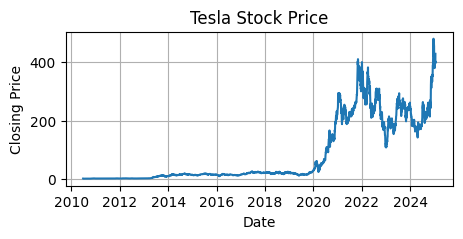

In [20]:
# Creating the plot for Tesla Stock:

# Step 1: Import necessary libraries/dependencies to complete this task
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Define the custom function 'make_graph' 
def make_graph(df, title):
    """
    Plots the 'Close' column of the given DataFrame.

    Args:
        df: The DataFrame containing the stock data.
        title: The title for the plot.
    """
    plt.figure(figsize=(5, 2)) # the dimension size could vary as needed
    plt.plot(df['Date'], df['Close']) 
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True) 
    plt.show()

# Step 3: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max") 

# Step 4: Reset the index 
tesla_data.reset_index(inplace=True) 

# Step 5: Call the make_graph function
make_graph(tesla_data, "Tesla Stock Price")

# Question 6: Plot GameStop Stock Graph(GameStop)

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

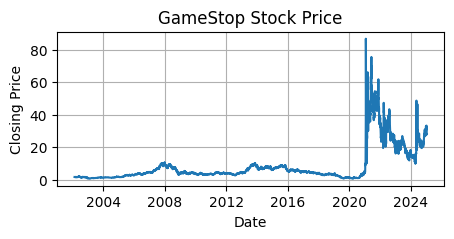

In [21]:
# Creating the plot for GeameStop Stock:

# Step 1: Import necessary libraries/dependencies to complete this task
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Define the custom function 'make_graph' 
def make_graph(df, title):
    """
    Plots the 'Close' column of the given DataFrame.

    Args:
        df: The DataFrame containing the stock data.
        title: The title for the plot.
    """
    plt.figure(figsize=(5, 2)) # the dimension size could vary as needed
    plt.plot(df['Date'], df['Close']) 
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True) 
    plt.show()

# Step 3: Download GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max") 

# Step 4: Reset the index 
gamestop_data.reset_index(inplace=True) 

# Step 5: Call the make_graph function
make_graph(gamestop_data, "GameStop Stock Price")